In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("banking_data.csv")

In [3]:
# Let us find potential redundancy between columns "marital" and "marital_status".
print(df['marital'].value_counts())
print("\n")
print(df['marital_status'].value_counts())
print("\n")

marital
married     27216
single      12790
divorced     5207
Name: count, dtype: int64


marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64




In [4]:
# As we can observe, the columns "marital" and "marital_status" are the same. Thus, we can drop one of them.
df.drop(columns=['marital_status'], inplace=True)
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'day_month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
# Let us find the number of missing values in each column of the data set.
print(df.isnull().sum())

age          0
job          0
marital      3
education    3
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
day_month    0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# The "marital" column is a categorical variable with just 3 categoies. Thus, we can replace the null values present in this column with the mode, using the imputation technique.
df['marital'] = df['marital'].fillna(df['marital'].mode()[0])

# The "education" column is a categorical variable with just 4 columns. Thus, we can replace the null values present in this column with the mode, using the imputation technique.
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Let us check whether we were able to remove the null values in these columns.
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
day_month    0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


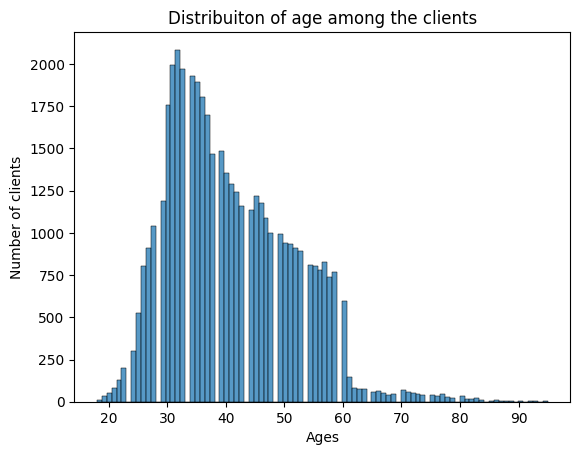

In [7]:
# Answer 1
sns.histplot(data=df['age'])
plt.title("Distribuiton of age among the clients")
plt.xlabel('Ages')
plt.ylabel("Number of clients")
plt.show()

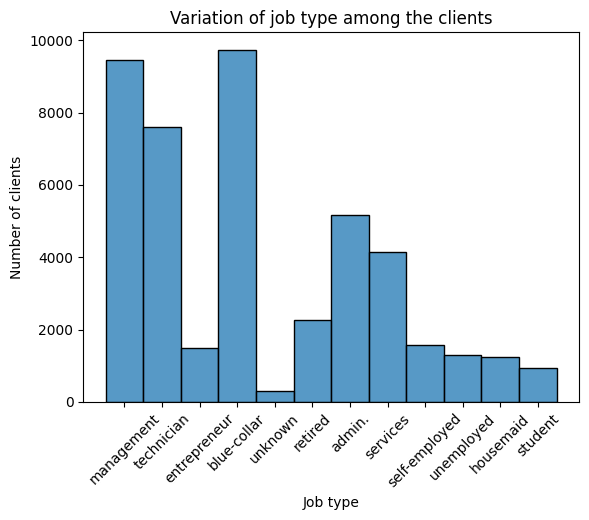

In [8]:
# Answer 2
sns.histplot(data=df['job'])
plt.title("Variation of job type among the clients")
plt.xticks(rotation=45)
plt.xlabel("Job type")
plt.ylabel("Number of clients")
plt.show()

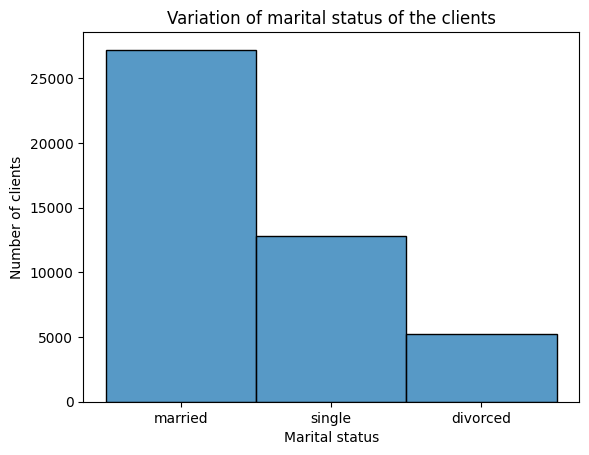

In [9]:
# Answer 3
sns.histplot(data=df['marital'])
plt.title("Variation of marital status of the clients")
plt.xlabel("Marital status")
plt.ylabel("Number of clients")
plt.show()

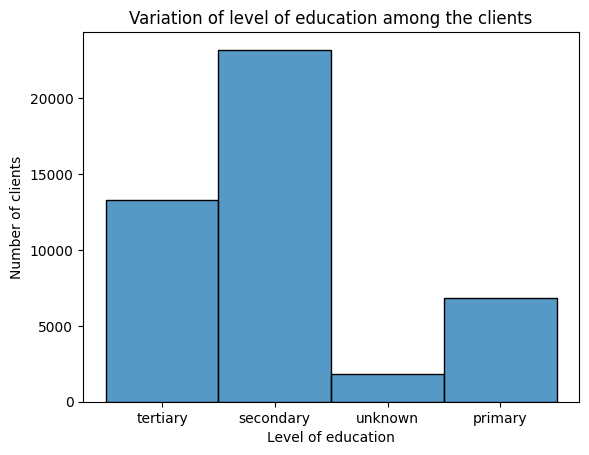

In [10]:
# Answer 4
sns.histplot(data=df['education'])
plt.title("Variation of level of education among the clients")
plt.xlabel("Level of education")
plt.ylabel("Number of clients")
plt.show()

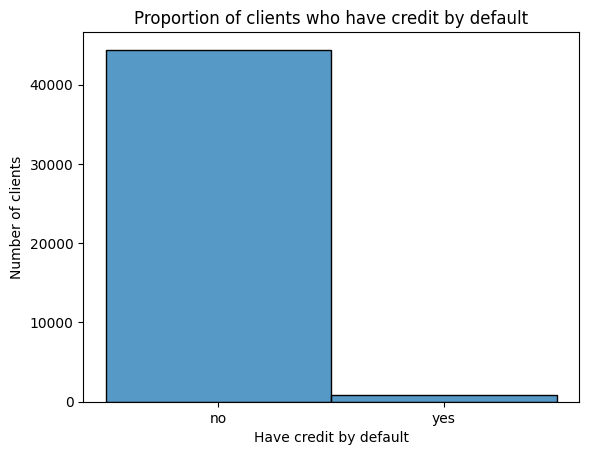

In [11]:
# Answer 5
sns.histplot(data=df['default'])
plt.title("Proportion of clients who have credit by default")
plt.xlabel("Have credit by default")
plt.ylabel("Number of clients")
plt.show()

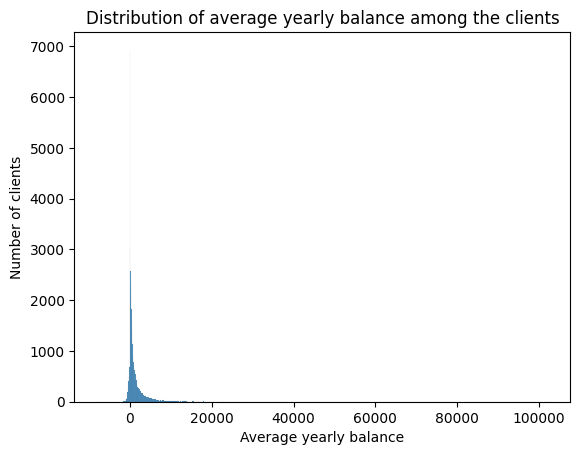

In [12]:
# Answer 6
sns.histplot(data=df['balance'])
plt.title("Distribution of average yearly balance among the clients")
plt.xlabel("Average yearly balance")
plt.ylabel("Number of clients")
plt.show()

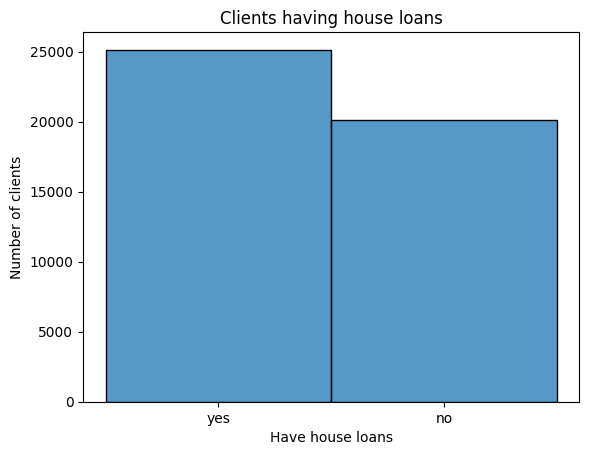

In [13]:
# Answer 7
sns.histplot(data=df['housing'])
plt.title("Clients having house loans")
plt.xlabel("Have house loans")
plt.ylabel("Number of clients")
plt.show()

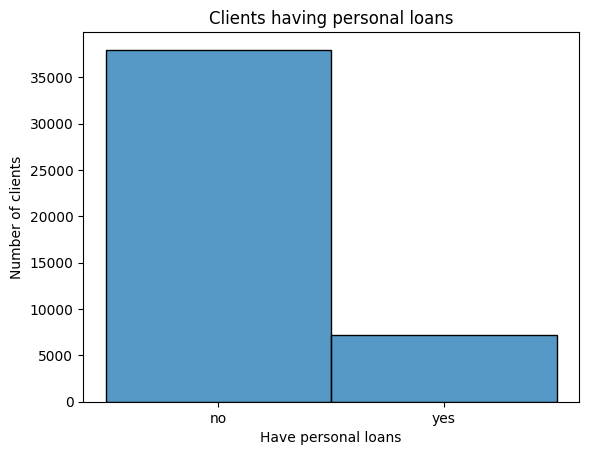

In [14]:
# Answer 8
sns.histplot(data=df['loan'])
plt.title("Clients having personal loans")
plt.xlabel("Have personal loans")
plt.ylabel("Number of clients")
plt.show()

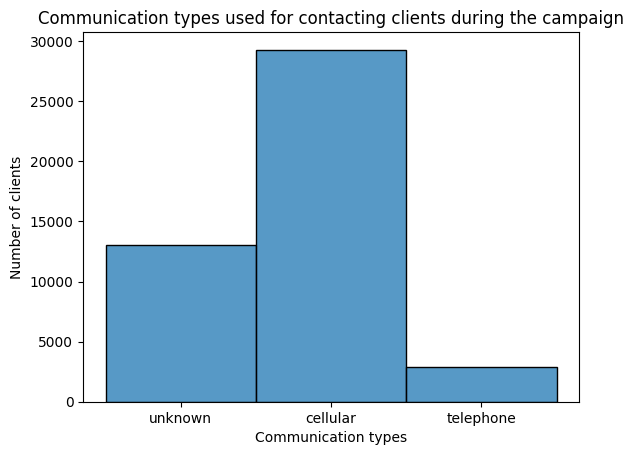

In [15]:
# Answer 9
sns.histplot(data=df['contact'])
plt.title("Communication types used for contacting clients during the campaign")
plt.xlabel("Communication types")
plt.ylabel("Number of clients")
plt.show()

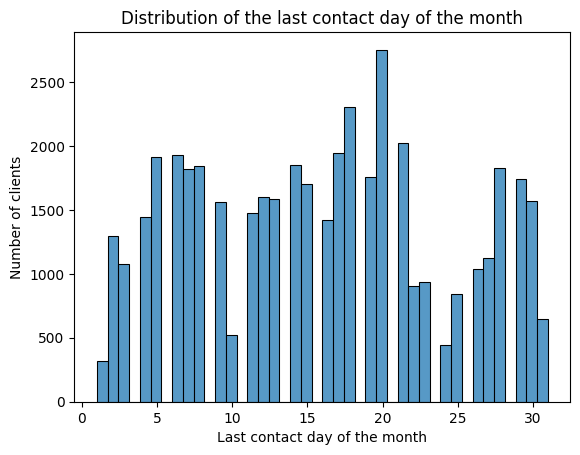

In [16]:
# Answer 10
sns.histplot(data=df['day'])
plt.title("Distribution of the last contact day of the month")
plt.xlabel("Last contact day of the month")
plt.ylabel("Number of clients")
plt.show()

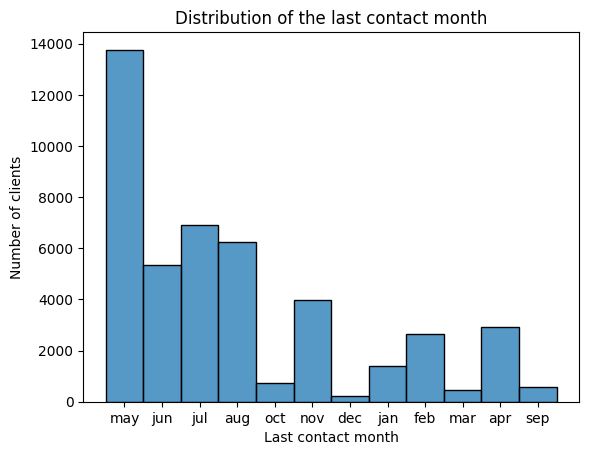

In [17]:
# Answer 11
sns.histplot(data=df['month'])
plt.title("Distribution of the last contact month")
plt.xlabel("Last contact month")
plt.ylabel("Number of clients")
plt.show()

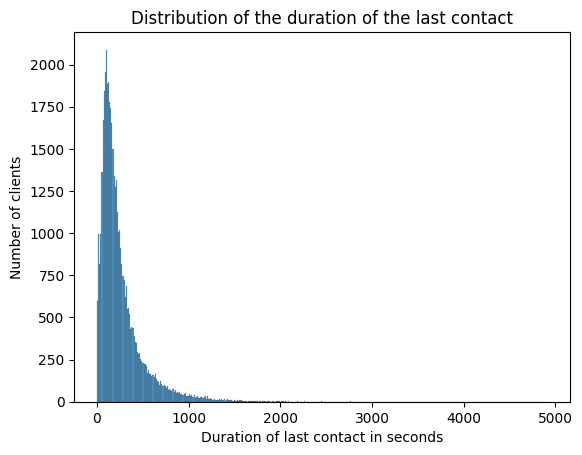

In [18]:
# Answer 12
sns.histplot(data=df['duration'])
plt.title("Distribution of the duration of the last contact")
plt.xlabel("Duration of last contact in seconds")
plt.ylabel("Number of clients")
plt.show()

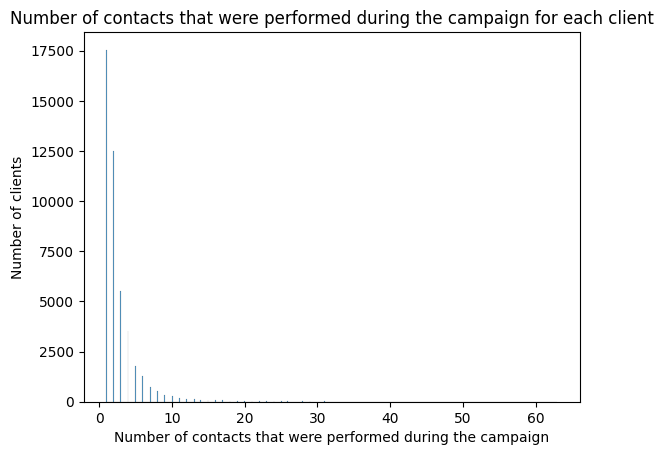

In [19]:
# Answer 13
sns.histplot(data=df['campaign'])
plt.title("Number of contacts that were performed during the campaign for each client")
plt.xlabel("Number of contacts that were performed during the campaign")
plt.ylabel("Number of clients")
plt.show()

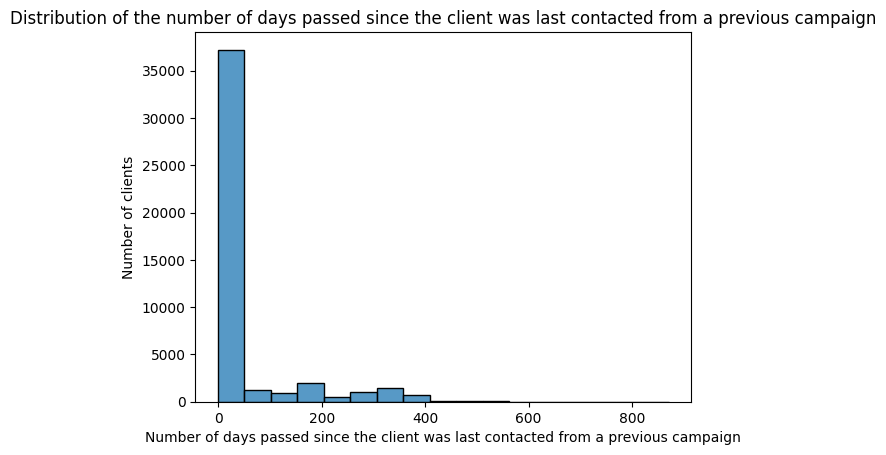

In [20]:
# Answer 14
sns.histplot(data=df['pdays'])
plt.title("Distribution of the number of days passed since the client was last contacted from a previous campaign")
plt.xlabel("Number of days passed since the client was last contacted from a previous campaign")
plt.ylabel("Number of clients")
plt.show()

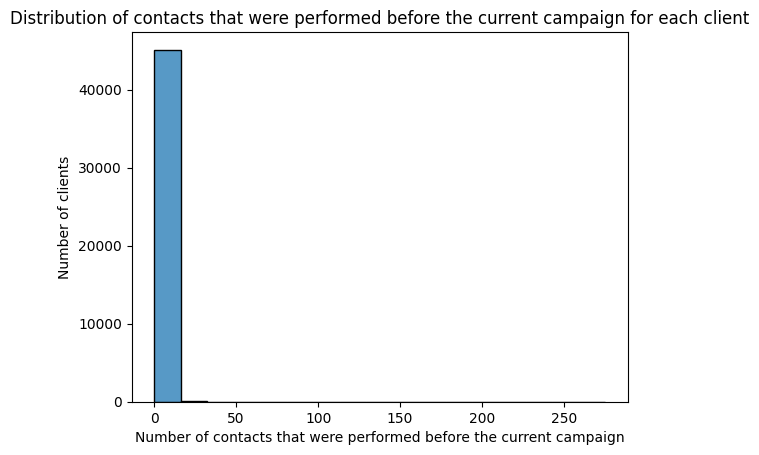

In [21]:
# Answer 15
sns.histplot(data=df['previous'])
plt.title("Distribution of contacts that were performed before the current campaign for each client")
plt.xlabel("Number of contacts that were performed before the current campaign")
plt.ylabel("Number of clients")
plt.show()

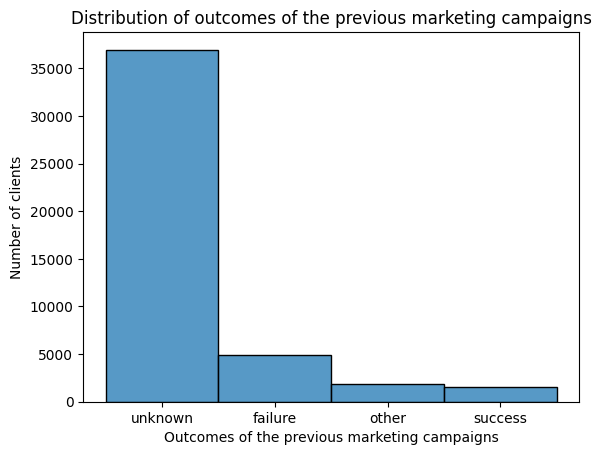

In [22]:
# Answer 16
sns.histplot(data=df['poutcome'])
plt.title("Distribution of outcomes of the previous marketing campaigns")
plt.xlabel("Outcomes of the previous marketing campaigns")
plt.ylabel("Number of clients")
plt.show()

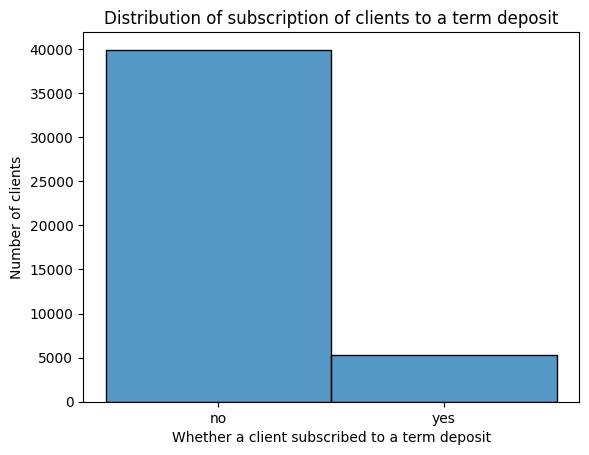

In [23]:
# Answer 17
sns.histplot(data=df['y'])
plt.title("Distribution of subscription of clients to a term deposit")
plt.xlabel("Whether a client subscribed to a term deposit")
plt.ylabel("Number of clients")
plt.show()

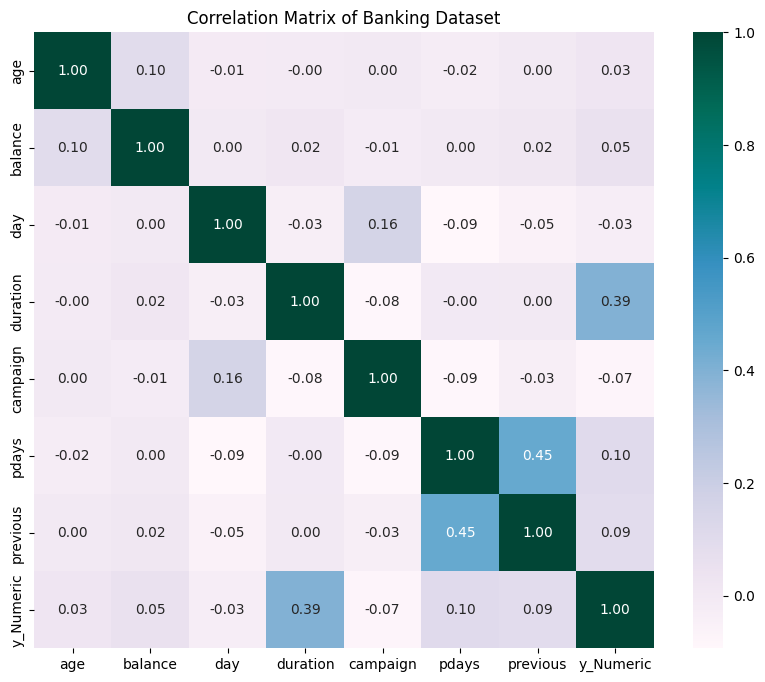

In [24]:
# Answer 18
# Replacing "yes" and "no" with 1 and 0 in the "y" column so that it gets included in all the numeric variables used in the correlation matrix
df['y_Numeric'] = df['y'].map({"yes":1, "no":0})
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8)) # Height-width figure size
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f') # Pu is purple, Bu is blue and Gn is green. Pu is highest negative correlation and Gn is highest positive correlation.
plt.title('Correlation Matrix of Banking Dataset')
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

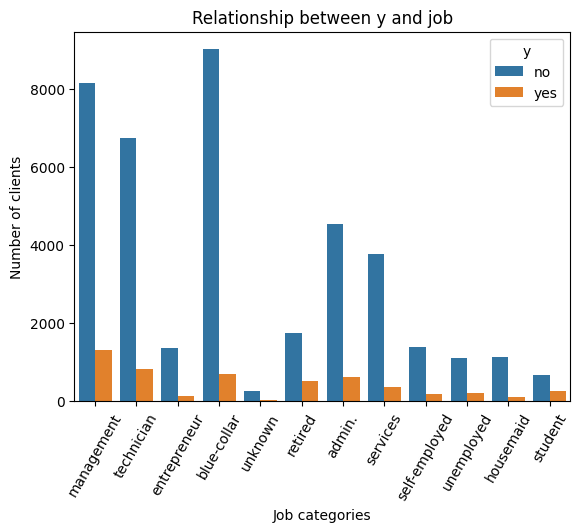

Chi-square statistic: 841.5452614002221
P-value: 2.2635164806103493e-173
Reject the null hypothesis: There is a significant association between the variables.


In [25]:
# Answer 18 : Relationship between job and y
sns.countplot(x='job', hue='y', data=df)
plt.title("Relationship between y and job")
plt.xlabel("Job categories")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Applying the chi square test of independence on job type and y
contingency_Table = pd.crosstab(df['job'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

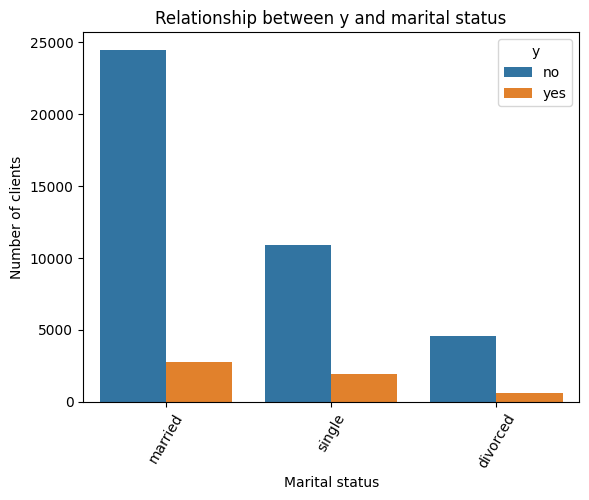

Chi-square statistic: 196.2832184416284
P-value: 2.3858364554553214e-43
Reject the null hypothesis: There is a significant association between the variables.


In [26]:
# Answer 18 : Relationship between marital status and y
sns.countplot(x='marital', hue='y', data=df)
plt.title("Relationship between y and marital status")
plt.xlabel("Marital status")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Applying the chi square test of independence on marital status and y
contingency_Table = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

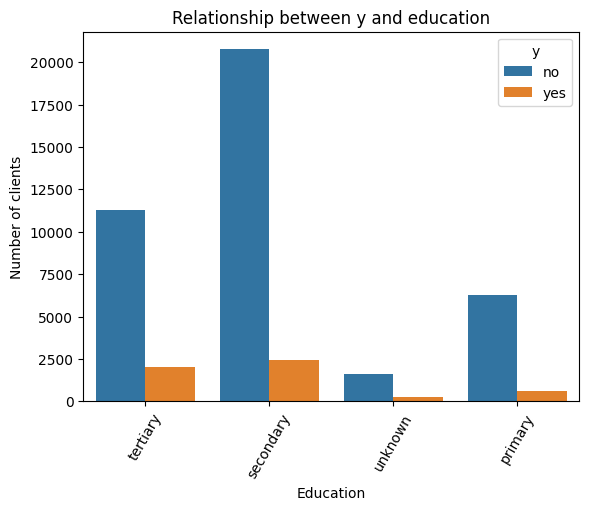

Chi-square statistic: 238.2583141637103
P-value: 2.2653744004778762e-51
Reject the null hypothesis: There is a significant association between the variables.


In [27]:
# Answer 18 : Relationship between education and y
sns.countplot(x='education', hue='y', data=df)
plt.title("Relationship between y and education")
plt.xlabel("Education")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Applying the chi square test of independence on education and y
contingency_Table = pd.crosstab(df['education'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

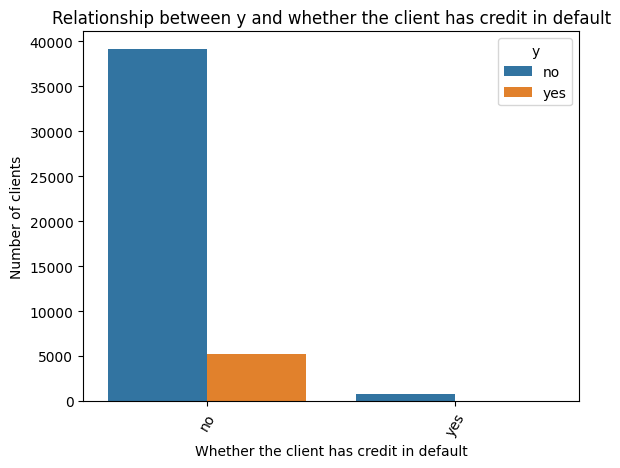

Chi-square statistic: 22.268639949059025
P-value: 2.3704645045981514e-06
Reject the null hypothesis: There is a significant association between the variables.


In [28]:
# Answer 18 : Relationship between whether the client has credit in default and y
sns.countplot(x='default', hue='y', data=df)
plt.title("Relationship between y and whether the client has credit in default")
plt.xlabel("Whether the client has credit in default")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on having credit in default and y
contingency_Table = pd.crosstab(df['default'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

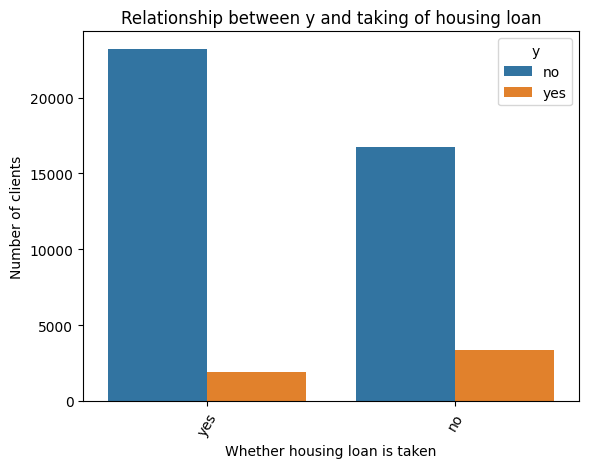

Chi-square statistic: 878.3448825348537
P-value: 5.005490373278558e-193
Reject the null hypothesis: There is a significant association between the variables.


In [29]:
# Answer 18 : Relationship between housing loan and y
sns.countplot(x='housing', hue='y', data=df)
plt.title("Relationship between y and taking of housing loan")
plt.xlabel("Whether housing loan is taken")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on housing loan and y
contingency_Table = pd.crosstab(df['housing'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

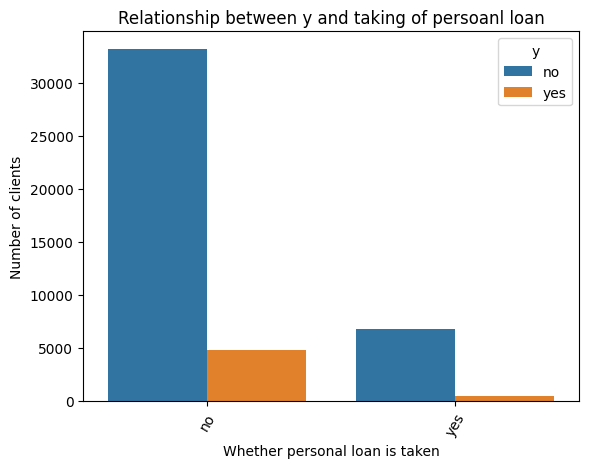

Chi-square statistic: 210.27814514589792
P-value: 1.1944902411150737e-47
Reject the null hypothesis: There is a significant association between the variables.


In [30]:
# Answer 18 : Relationship between personal loan and y
sns.countplot(x='loan', hue='y', data=df)
plt.title("Relationship between y and taking of persoanl loan")
plt.xlabel("Whether personal loan is taken")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on personal loan and y
contingency_Table = pd.crosstab(df['loan'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

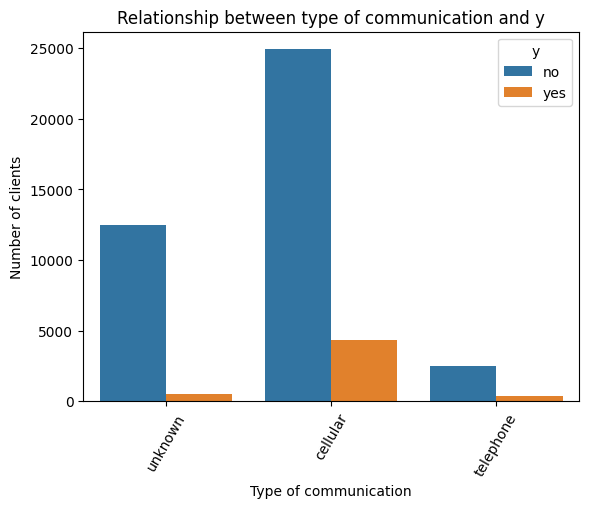

Chi-square statistic: 1037.6674151454113
P-value: 4.7139370187160045e-226
Reject the null hypothesis: There is a significant association between the variables.


In [31]:
# Answer 18 : Relationship between type of communication and y
sns.countplot(x='contact', hue='y', data=df)
plt.title("Relationship between type of communication and y")
plt.xlabel("Type of communication")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on type of communication and y
contingency_Table = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

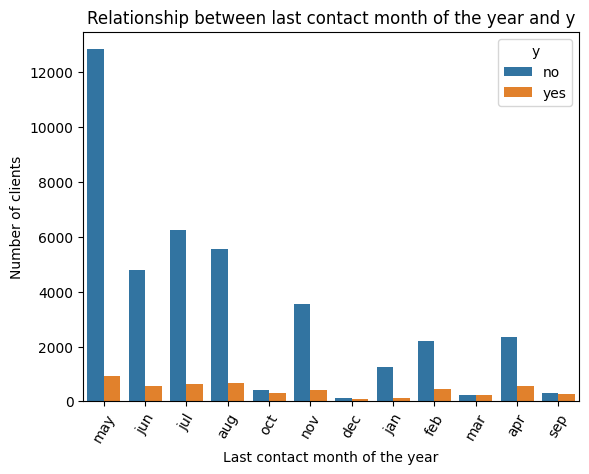

Chi-square statistic: 3058.3353989766065
P-value: 0.0
Reject the null hypothesis: There is a significant association between the variables.


In [32]:
# Answer 18 : Relationship between last contact month of the year and y
sns.countplot(x='month', hue='y', data=df)
plt.title("Relationship between last contact month of the year and y")
plt.xlabel("Last contact month of the year")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on last contact month of the year and y
contingency_Table = pd.crosstab(df['month'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

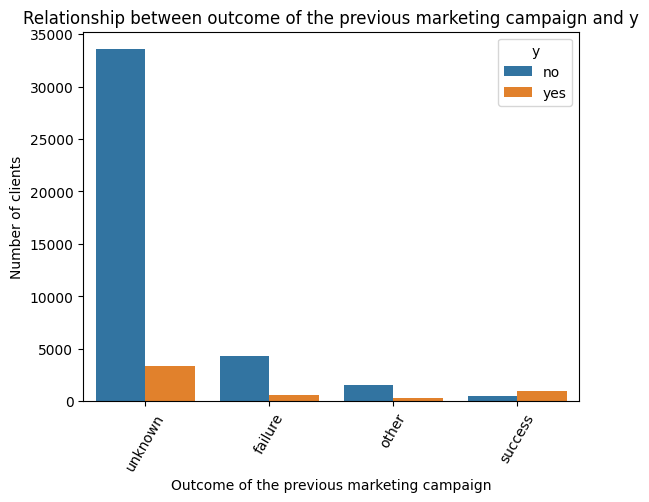

Chi-square statistic: 4400.2843429105305
P-value: 0.0
Reject the null hypothesis: There is a significant association between the variables.


In [33]:
# Answer 18 : Relationship between outcome of the previous marketing campaign and y
sns.countplot(x='poutcome', hue='y', data=df)
plt.title("Relationship between outcome of the previous marketing campaign and y")
plt.xlabel("Outcome of the previous marketing campaign")
plt.xticks(rotation=60)
plt.ylabel("Number of clients")
plt.show()

# Non numeric variables : job, marital, education, default, housing, loan, contact, month, poutcome

# Applying the chi square test of independence on outcome of the previous marketing campaign and y
contingency_Table = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_Table)
alpha = 0.05
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
if p <= alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")